# Lab 3: Pandas and Matplotlib

## Introduction 
The main objective of this laboratory is to put into practice what you have learned on the Pandas and Matplotlib libraries.
This laboratory will let you carry out a preparatory data exploration analysis on two realworld
datasets, and practice the advanced functionalities of both libraries.

## 1 Preliminary Steps
### 1.1 Importing the libraries
Make sure that both the libraries are installed on your machine. If not, install them using the
following commands:
```python
!pip install pandas
!pip install matplotlib
```
then check their availability by importing them:
```python
import pandas as pd
import matplotlib.pyplot as plt
```

In [4]:
%matplotlib inline
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### 1.2 Loading the datasets
In this laboratory we will use the two following datasets:
- **New York Point Of Interest** dataset: a dataset containing the list of the Points of Interest (POI)
in New York City. The dataset is available at the following link: <https://github.com/dbdmg/data-science-lab/raw/master/datasets/NYC_POIs.zip>
- **IRIS** dataset: a dataset containing the measurements of the sepal and petal of 150 iris flowers (already introduced in previous laboratories).
The dataset is available as a CSV file at the following link: <https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data>

### 1.2.1 New York Point Of Interest dataset
In the zip file above you will find three files:
- 'pois_all_info': the main dataset file containing the list of all the POIs in New York City. It is provided in TSV (Tab Separated Values) format. This format is very similar to the CSV one, the only difference is the separator used to split the fields in a row: here it is a TAB character
- 'ny_municipality_pois_id.csv': a file containing the list of the POIs belonging to the New York City municipality only. It is provided in the CSV format.
- New_York_City_Map.PNG: a map of the New York City municipality. It is provided in the PNG format.

In the first file you will find the New York Point Of Interest dataset which collects a sub-sample of the point of interests (POI) available in the city of New York. It contains the coordinates of each point of interest and the category to which it belongs to, specifying the type of the POI, for each POI category. There are four possible categories of POIs: amenity, shop, public_transport and highway.
The fields available in the dataset are the following:
- **@id**: the unique identifier of the POI;
- **@lat**: the latitude coordinate of the POI in decimal degrees;
- **@lon**: the longitude coordinate of the POI in decimal degrees;
- **amenity**, **name**: if the POI category is amenity its type is reported in this field followed by the name of the POI;
- **shop**: if the POI category is shop its type is reported in this field;
- **public_transport**: if the POI category is public_transport its type is reported in this field;
- **highway**: if the POI category is highway its type is reported in this field.

In the second file we have a list of the POIs belonging only to the New York City municipality. We will use it to select the NY POIs from the first file.

In the third file we have a map of the New York City municipality. This map will be used to plot the POIs on the map.


To download the zip file use the following command:
```python
### linux users
!wget  https://github.com/dbdmg/data-science-lab/raw/master/datasets/NYC_POIs.zip
### windows users
!pip install wget
import wget
wget.download("https://github.com/dbdmg/data-science-lab/raw/master/datasets/NYC_POIs.zip")
```
then unzip it with the following command:
```python
import shutil
shutil.unpack_archive("NYC_POIs.zip", ".")
```

Be sure that you have extract it correctly by displaying the third file with the following command:
```python
import matplotlib.pyplot as plt

img = plt.imread("New_York_City_Map.PNG")
plt.imshow(img)
plt.show()
```


In [1]:
!wget  https://github.com/dbdmg/data-science-lab/raw/master/datasets/NYC_POIs.zip

import shutil
shutil.unpack_archive("NYC_POIs.zip", ".")



7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://github.com/dbdmg/data-]870 files                0% [<=>                           ]       0          B/s87[Files: 0  Bytes: 0  [0 B/s] Re]87[https://raw.githubusercontent.]87NYC_POIs.zip           2% [>                             ]   44.38K    --.-KB/s87NYC_POIs.zip          80% [=======================>      ]    1.23M    9.57MB/s87NYC_POIs.zip         100% [=============================>]    1.54M   10.83MB/s87[Files: 1  Bytes: 1.54M [525.62]8

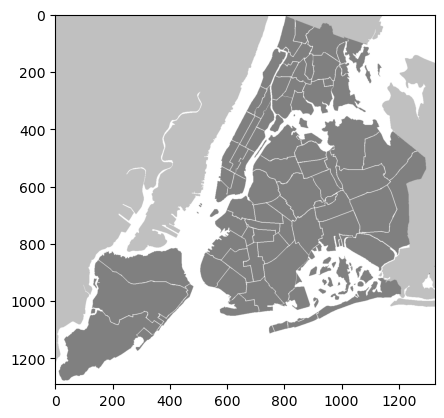

In [2]:
import matplotlib.pyplot as plt

img = plt.imread("New_York_City_Map.PNG")
plt.imshow(img)
plt.show()

## 2 Exercises
### 2.1 Data exploration of Point Of Interest dataset

#### 2.1.1 Loading the dataset
Load the dataset in a Pandas DataFrame. The dataset is provided in the TSV format, so you have to use the read_csv function of Pandas specifying 
- the separator to use to split the fields in a row. The separator is a TAB character, so you have to use the following parameter: `sep='\t'`.
- the id of the column to use as index. The id of the column is `@id`, so you have to use the following parameter: `index_col='@id'`.

Show the first rows of the dataset to understand what's inside. 

In [6]:
POI_dataset = pd.read_csv('./pois_all_info', sep='\t', index_col='@id', low_memory=False)
POI_dataset.head()

@type       @lat       @lon         amenity  \
@id                                                    
42432939  node  40.814104 -73.949623             NaN   
42448838  node  40.761647 -73.949864             NaN   
42723103  node  40.852182 -73.772677  ferry_terminal   
42764076  node  40.867164 -73.882158             NaN   
42811266  node  40.704806 -73.772734             NaN   

                                name shop public_transport highway  
@id                                                                 
42432939                         NaN  NaN    stop_position     NaN  
42448838                         NaN  NaN    stop_position     NaN  
42723103  Hart Island Ferry Terminal  NaN              NaN     NaN  
42764076            Botanical Garden  NaN    stop_position     NaN  
42811266                         NaN  NaN    stop_position     NaN

#### 2.1.2 Plotting POIs on the map
Plot the POIs on the map of the New York City municipality. To do this, you have to use the
`scatter` function of Matplotlib. 
 - The `scatter` function takes as input the x and y coordinates of the  points to plot. 
  - Set 1 as the dimension of the points, otherwise it may be difficult to visualize them on the map 


Also to plot the map we use the `imread` and the `imshow` functions of Matplotlib. 
- The `imread` function takes as input the path of the image to load. We add also `extent= [-74.258, -73.7, 40.49,40.92]` as parameter to the `imshow` function to map the image pixels to the coordinates of the city.
- The `imshow` function takes as input the image to plot. 



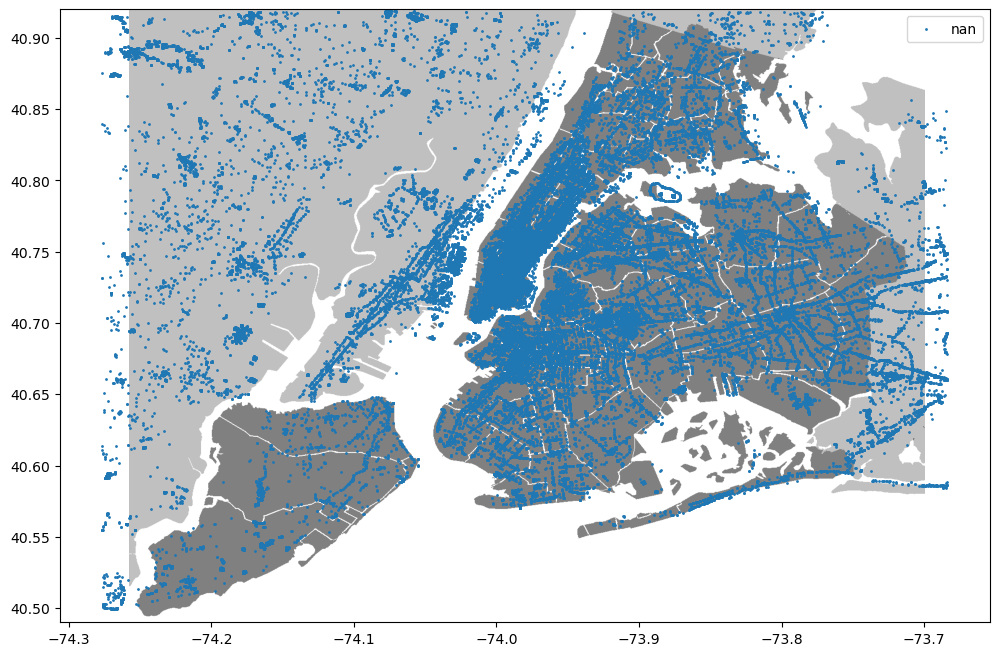

In [144]:
def plot_map(pois_df: pd.DataFrame, label=None):
    fig, ax = plt.subplots(figsize=(12,8))
    nyc_img = plt.imread('./New_York_City_Map.PNG')
    ax.imshow(nyc_img, extent=[-74.258, -73.7, 40.49,40.92])

    scatter = ax.scatter(pois_df["@lon"], pois_df["@lat"], label=pois_df["amenity"], s=1)
    ax.legend(labels=pois_df["amenity"])
    plt.show()

plot_map(POI_dataset)

#### 2.1.2 Filter only POIS in NY municipality**
Filter the POIs in the New York City municipality. To do this, you have to:
- Read the second file containing the list of the POIs belonging to the New York City municipality only.
The second file does not contain a header, so you have to specify the `header=None` parameter to the `read_csv` function and set the column name to `@id` using the `names` parameter.

- Filter the POIs in the New York City municipality selecting the @id of the POIs in the municipality. 
Remember that you can filter a dataframe only using a list or a series. 

Then plot the resulting dataframe on the NY map using the `plot_map` function defined above.


In [22]:
POI_new_york_ids = pd.read_csv('./ny_municipality_pois_id.csv', sep=',', names=["@id"], index_col='@id')
POI_new_york_ids.head()


Empty DataFrame
Columns: []
Index: [42432939, 42448838, 42723103, 42764076, 42811266]

In [25]:
POI_new_york = pd.merge(POI_dataset, POI_new_york_ids, right_index=True, left_index=True)
POI_new_york.head()

@type       @lat       @lon         amenity  \
@id                                                    
42432939  node  40.814104 -73.949623             NaN   
42448838  node  40.761647 -73.949864             NaN   
42723103  node  40.852182 -73.772677  ferry_terminal   
42764076  node  40.867164 -73.882158             NaN   
42811266  node  40.704806 -73.772734             NaN   

                                name shop public_transport highway  
@id                                                                 
42432939                         NaN  NaN    stop_position     NaN  
42448838                         NaN  NaN    stop_position     NaN  
42723103  Hart Island Ferry Terminal  NaN              NaN     NaN  
42764076            Botanical Garden  NaN    stop_position     NaN  
42811266                         NaN  NaN    stop_position     NaN

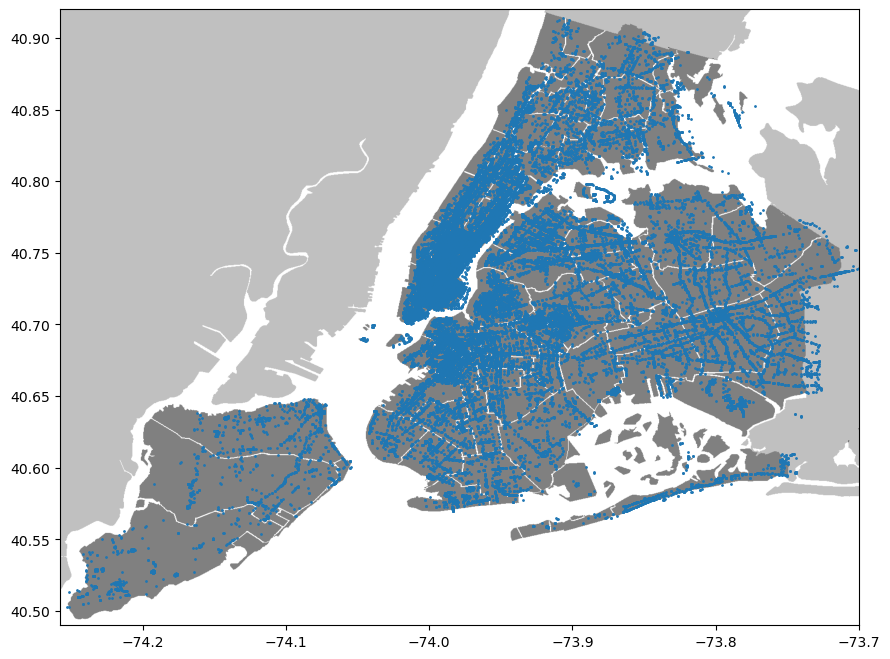

In [26]:
plot_map(POI_new_york)

#### 2.1.3 Add a category column to the dataframe
Add a category column to the dataframe containing the category of each POI (amenity, shop, public_transport or highway) according to which field is not NaN.
To do so you can use the `notnull()` function of Pandas dataframes.


In [86]:
POI_dataset['category'] = None
categories = ["amenity", "shop", "public_transport", "highway"]
for category in categories:
    ids = POI_dataset.notnull().query(f"{category} == True").index
    POI_dataset.loc[ids, 'category'] = category

POI_dataset.head()

@type       @lat       @lon         amenity  \
@id                                                    
42432939  node  40.814104 -73.949623             NaN   
42448838  node  40.761647 -73.949864             NaN   
42723103  node  40.852182 -73.772677  ferry_terminal   
42764076  node  40.867164 -73.882158             NaN   
42811266  node  40.704806 -73.772734             NaN   

                                name shop public_transport highway  \
@id                                                                  
42432939                         NaN  NaN    stop_position     NaN   
42448838                         NaN  NaN    stop_position     NaN   
42723103  Hart Island Ferry Terminal  NaN              NaN     NaN   
42764076            Botanical Garden  NaN    stop_position     NaN   
42811266                         NaN  NaN    stop_position     NaN   

                  category  
@id                         
42432939  public_transport  
42448838  public_transport  
42723103           amenity  
42764076  public_transport  
42811266  public_transport

#### 2.1.4 Analyze POIs per category
Now let's analyze the distribution of the POI types for each POI category. 
To do so, you have to:
- Group the POIs by category.
- Count the number of occurrences of each category.
- With the obtained values, plot a bar chart using the `bar` function of Matplotlib.



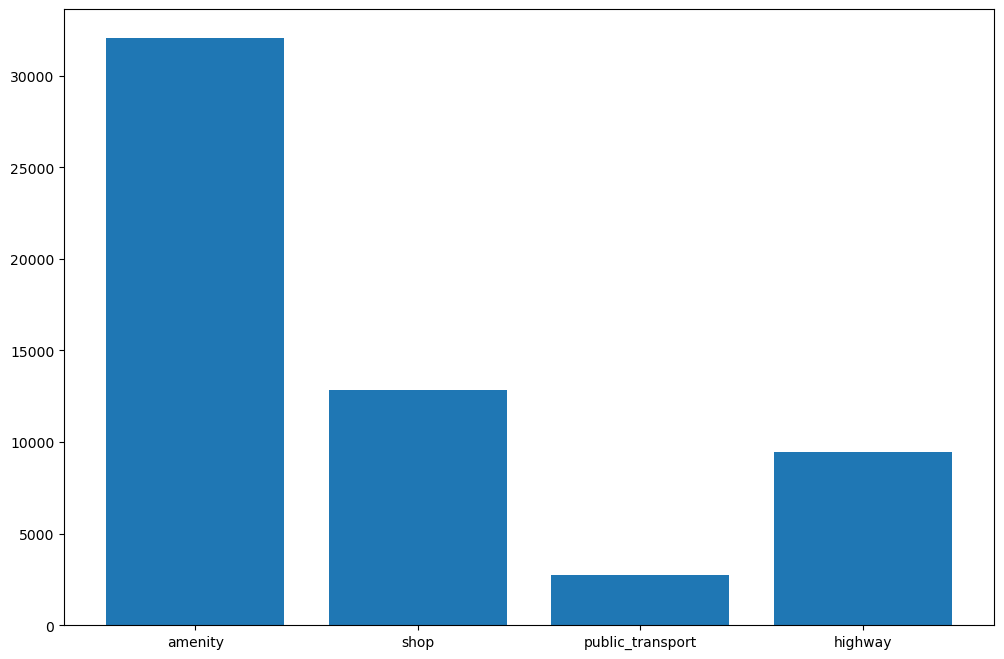

In [98]:
category_summary = POI_dataset.groupby("category").count()

y = [category_summary[category][category] for category in categories]
x = [1, 2, 3, 4]

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x, y, tick_label=categories)
plt.show()



#### 2.1.5 Count top-frequent amenity types
Count the top-frequent amenity types. To do this, you have to:
- Group the POIs by amenity type.
- Count the number of occurrences of each amenity type.
- Sort the amenity types by frequency in descending order (use the `sort_values` function of Pandas).


In [112]:
POI_amenities = POI_dataset.query("category == 'amenity'")
POI_amenities_count = POI_amenities.groupby("amenity")["amenity"].count().sort_values(ascending=False)
POI_amenities_count.head()

amenity
bicycle_parking     6644
restaurant          4963
bench               2110
fast_food           1985
place_of_worship    1853
Name: amenity, dtype: int64

#### 2.1.6 Plot the top-frequent amenity types on the map

Plot the top-frequent amenity types on the map. To do this, for each of the top 5 amenity type you have to:
- Filter the POIs by amenity type.
- Plot the POIs on the map using the `scatter` function of Matplotlib (remember to set the `label` for each amenity type).
- Add the legend to the map using the `legend` function of Matplotlib.


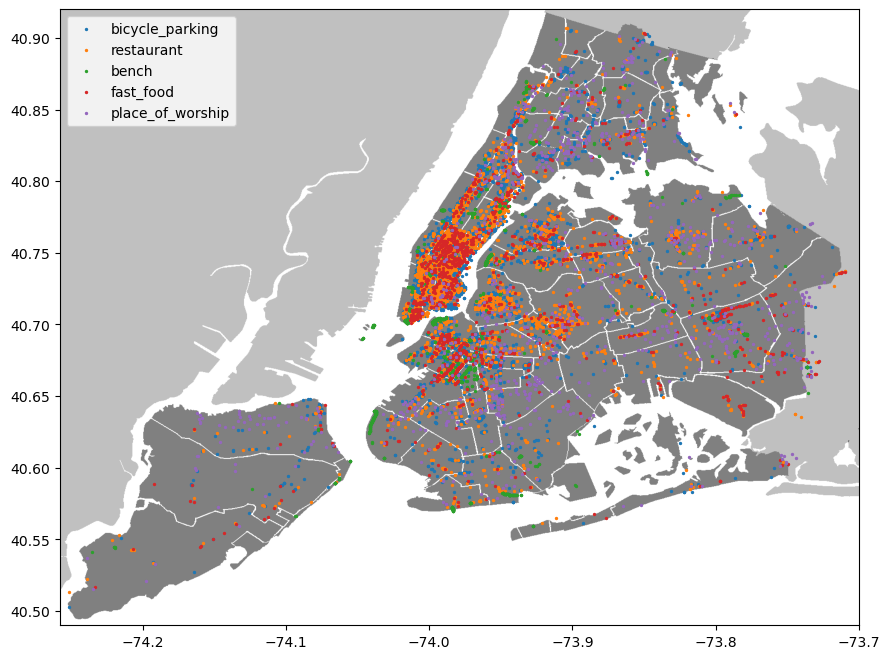

In [157]:
POI_amenities_top_five = POI_amenities_count[0:5].keys()
POI_amenities_filtered = POI_new_york[POI_new_york['amenity'].isin(POI_amenities_top_five)]

def plot_map(pois_df: pd.DataFrame, amenities_type=None):
    fig, ax = plt.subplots(figsize=(12,8))
    nyc_img = plt.imread('./New_York_City_Map.PNG')
    ax.imshow(nyc_img, extent=[-74.258, -73.7, 40.49,40.92])

    for name in amenities_type:
        tmp = pois_df[pois_df["amenity"] == name]
        ax.scatter(tmp["@lon"], tmp["@lat"], label=name, s=2)
    
    ax.legend(labels=amenities_type)
    plt.show()

plot_map(POI_amenities_filtered, POI_amenities_top_five)


#### 2.1.7 Analyze POIs within each category
Now let's analyze the distribution of the POI types within each POI category.
To do so, you have to:
- Filter the POIs by category.
- Group the POIs by the different category type (i.e., amenity type, shop type, highway type, public_transport type).
- Select the 5 most frequent category types (i.e., the 5 most frequent amenity types, the 5 most frequent shop types, etc.). 
- Plot the distribution of the POI category types with the `bar` function of Matplotlib.

*Note*: I want you to plot the four histograms in the same figure. To do so, you have to use the `subplot` function of Matplotlib. Specify also the title of each subplot according to the analysed category.


amenity
bicycle_parking     6644
restaurant          4963
bench               2110
fast_food           1985
place_of_worship    1853
Name: amenity, dtype: int64
shop
convenience    1188
clothes        1176
supermarket     877
hairdresser     683
beauty          609
Name: shop, dtype: int64
public_transport
stop_position     2709
station             36
service_center       2
Name: public_transport, dtype: int64
highway
bus_stop    9444
crossing       1
Name: highway, dtype: int64


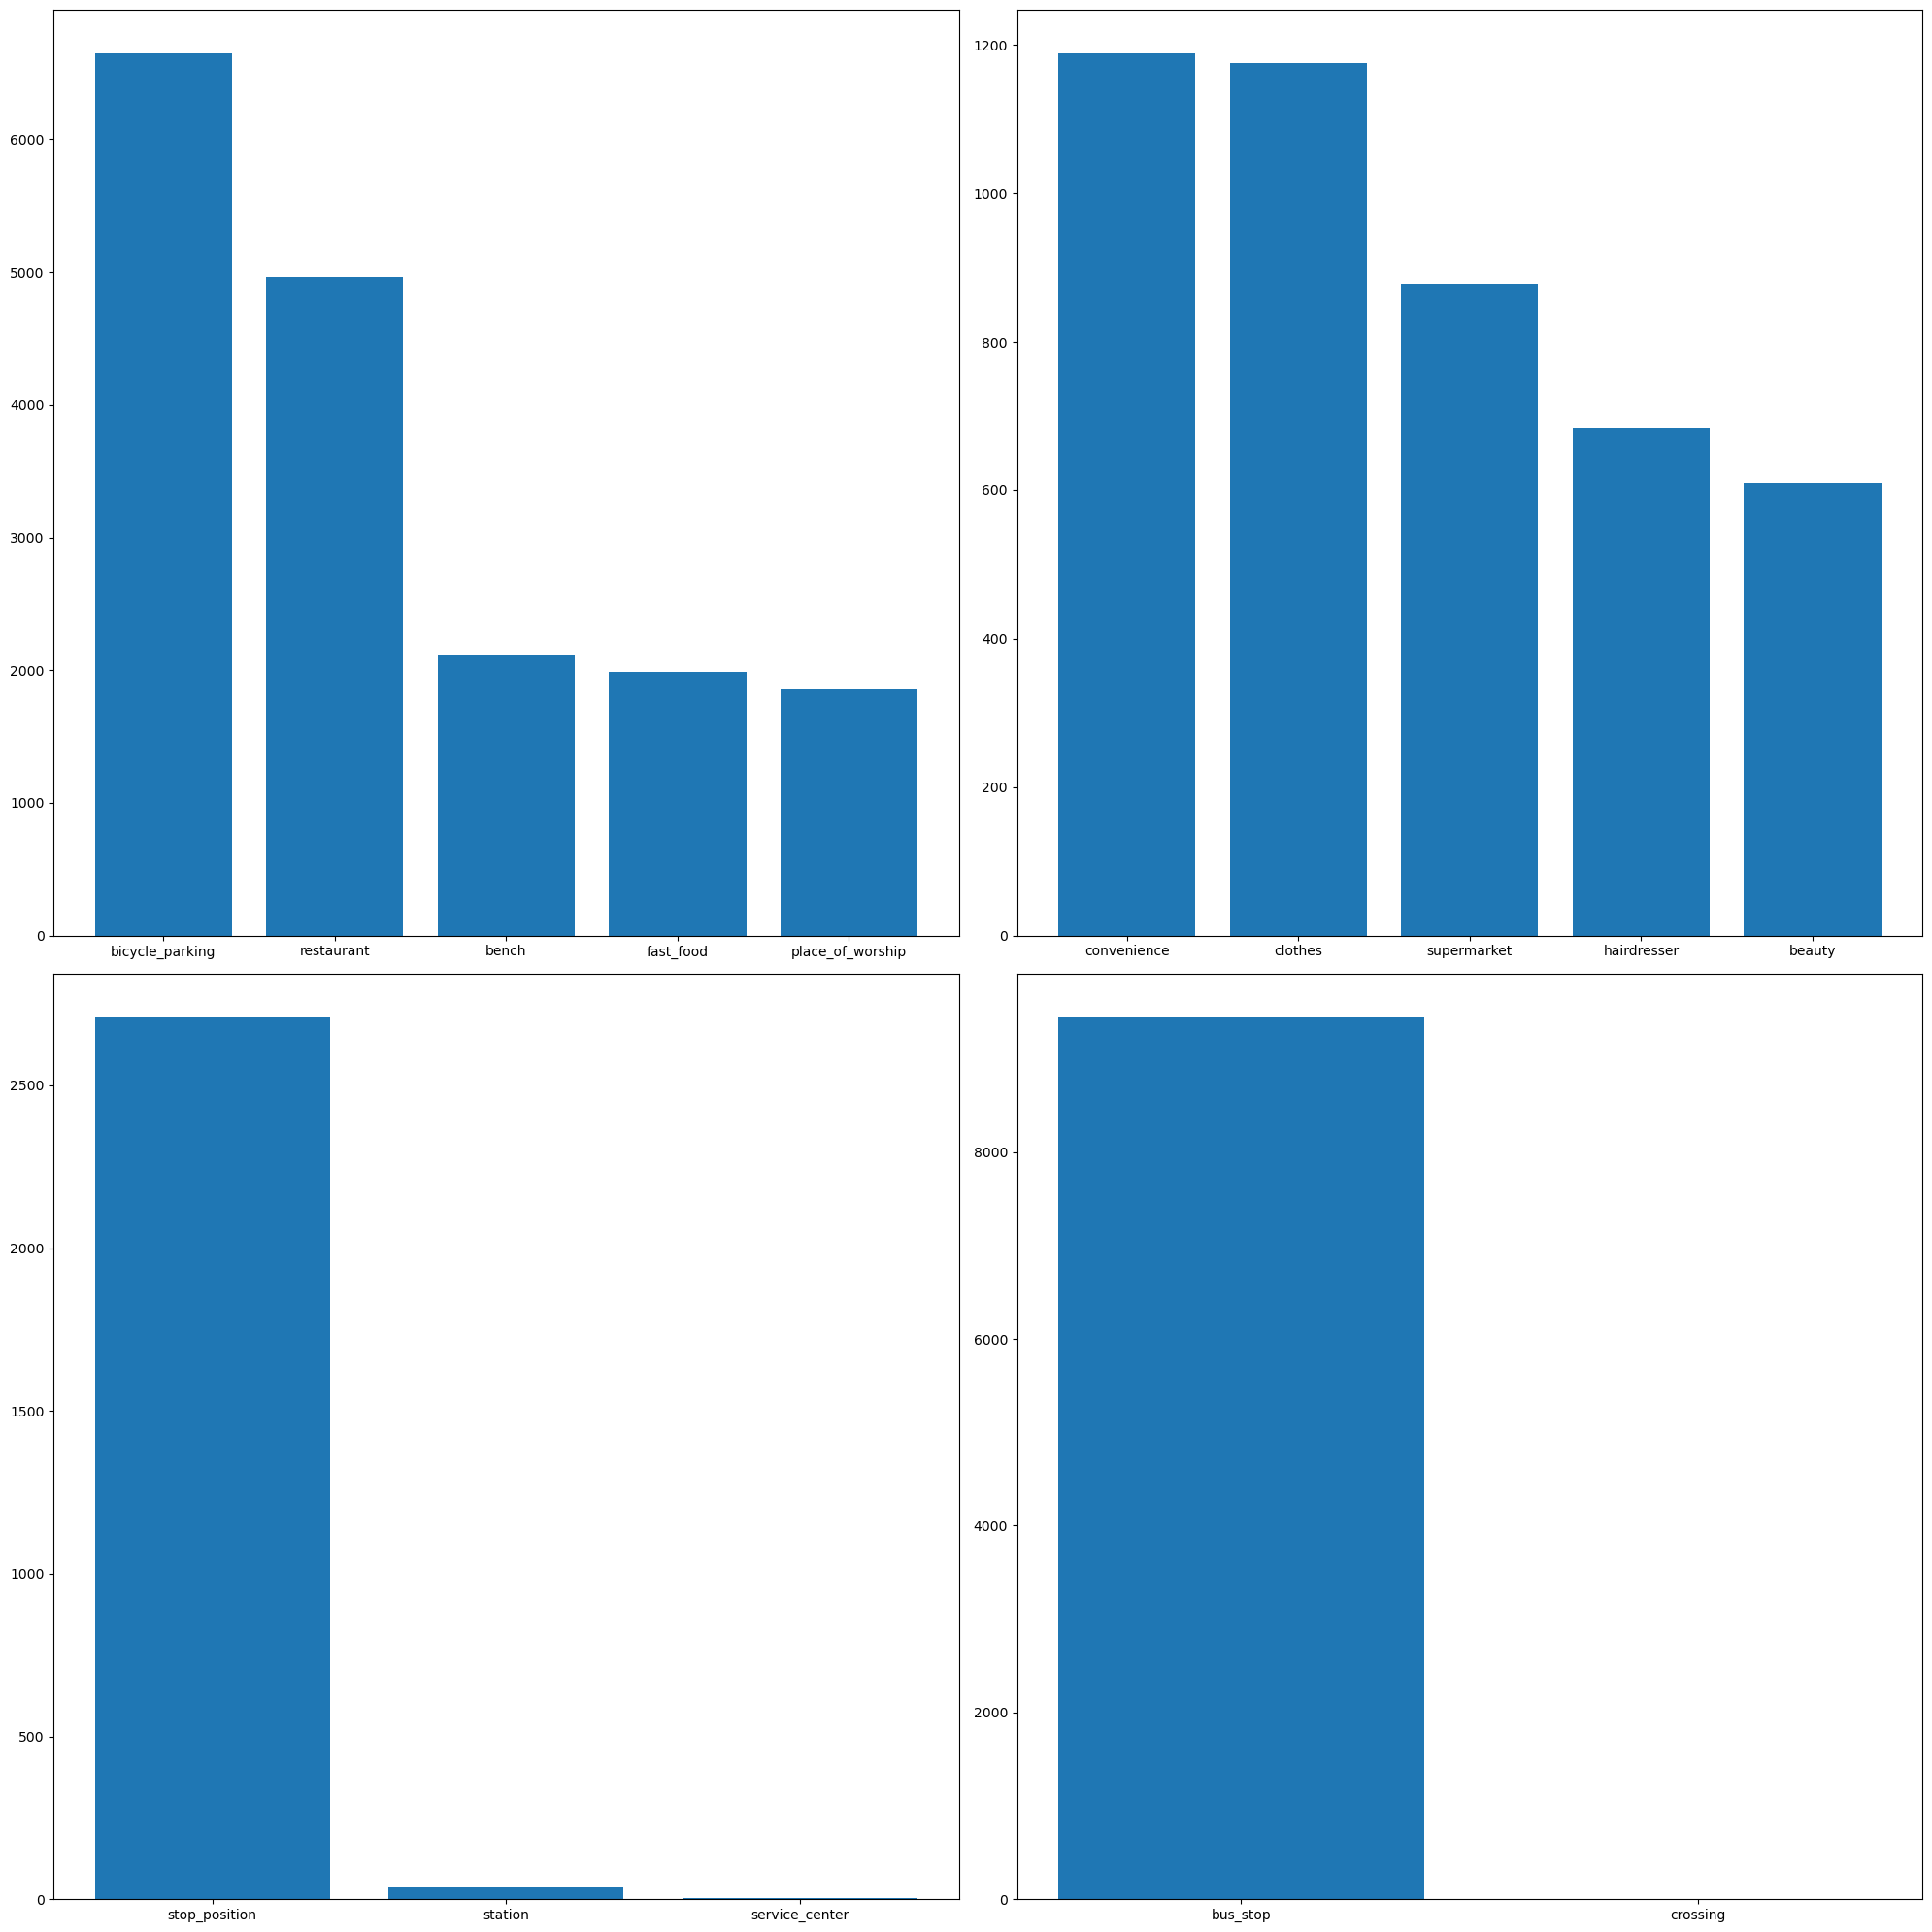

In [199]:
fig, axs = plt.subplots(2, 2, figsize=(20,20))

i = 0
j = 0

def get_next_plot():
    global i, j
    if j == 0:
        j += 1
    else:
        i += 1
        j = 0

for category in categories:
    POI_by_category = POI_dataset.query(f"category == '{category}'")
    POI_type = POI_by_category.groupby(category)[category].count().sort_values(ascending=False)
    POI_top_five = POI_type.head(5)
    POI_filtered = POI_dataset[POI_dataset['amenity'].isin(POI_top_five)]

    ax = axs[i,j]
    get_next_plot()

    ax.bar(POI_top_five.index, POI_top_five.values)

    print(POI_top_five)

plt.tight_layout()
plt.show()


### 2.2 Data exploration of IRIS dataset
#### 2.2.1 Loading the dataset
Load the dataset in a Pandas DataFrame. The dataset is provided in the CSV format, but remember that it has no header and so you have to specify the column names `['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']`.



#### 2.2.2 Analyze the distribution of the features
Analyze the distribution of the features. To do this, you have to:
- Plot the distribution of each feature using the `box` function of Matplotlib.

*Note*: to plot the four box plots within the same figure you have to pass a list of the four features to the `box` function of Matplotlib, together with a list of labels.


#### 2.2.3 Analyze the distribution of the features per class

For each class of the dataset, analyze the distribution of the features. To do this, you have to:
- Filter the data by class.
- Select the features of each class.
- Plot the distribution of each feature using the `box` function of Matplotlib.

This time note that you have to plot the four box plots in four different figures. To do so, you have to use the `subplot` function of Matplotlib.



Can you guess which features are the most discriminative to distinguish the different classes?

@insert the answer here


#### 2.2.4 Analyze the distribution of the features per class (2)

By using a `scatter` plot this time plot the distribution of data per class taking into considerations two features at a time. To do this, you have to:
- Select the two features to plot.  Use the `itertools.combinations` function to generate all the possible combinations of features.
- Color the samples according to their class. To do this, you have to use the `c` parameter of the `scatter` function of Matplotlib.
- Add the legend to the plot using the `legend` function of Matplotlib.


*Note*: to determine the number of plots in advance remember that this is a combination of elements problem without repetition. Therefore, the number of possible combinations is $C_{4}^{2} = \frac{4!}{2!(4-2)!} = 6$.


Does the previous plot confirm your intuition about the most discriminative features?
@ insert the answer here


#### ($\star$) 2.2.5 Plot closest samples and class means 
Taking into consideration the two most discriminative features, for a given sample plot the most similar samples from each class and the means of the classes. To do this you have to:
- select a random sample. Use the `sample()` function of Pandas dataframes which returns a random sample.
- plot the selected sample with a square marker
- compute the euclidean distance between the selected sample and all the other samples considering the two most discriminative features. Use the `norm` function of Numpy to compute the euclidean distance.
- select the most similar sample from each class
- plot the most similar samples from each class (with different labels and colours)
- plot the means of the classes. The marker of the means should be different from the marker of the samples and should be a star marker if the closest sample (of the three) belongs to the class or a cross marker if the closest sample does not belong to the class.  In both cases set a bigger size for the marker of the means.
- set for each plot a legend for the plot below the plot area (coordinates (0.9, -0.1))
 Repeat this for 5 randomly selected samples and plots the results into 5 sublpolts.
 